In [49]:
### FINAL PROJECT - PABLO GARCIA (13159411)

### 1. INITIAL STEPS

# First, I will import OS, scikit learn, keras and rest of libraries I will use during the feature selection and modelling
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'#I will use theano as keras backend
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dropout, Dense
from keras.layers import Flatten
from keras.utils import to_categorical
from keras.utils import np_utils

In [5]:
# When running the code from a different machine, please change the file location
data_train = pd.read_csv (r'/Users/jose/Documents/MSc_Data_Science/Year_2/Final project/Data Scania trucks/aps_failure_training_set.csv', sep= ",")
data_test = pd.read_csv (r'/Users/jose/Documents/MSc_Data_Science/Year_2/Final project/Data Scania trucks/aps_failure_test_set.csv', sep= ",")
data_train.head()
print(data_train.dtypes)

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object


In [6]:
### 2. DATA PRE-PROCESSING

## Train dataset: I will first convert train object data into numeric data, except the target variable 'class'

list_col = list(data_train.iloc[:,1:171])
data_train[list_col] = data_train[list_col].apply(pd.to_numeric, errors="coerce")
print(data_train.dtypes)

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object


In [7]:
## MISSING VALUES
# Train dataset: Replacing the na values of the train dataset with the previous value using 'ffill'
data_train = data_train.fillna(method='ffill')
data_train.dropna(inplace = True)
data_train.isnull().sum().sum()
data_train.head()
for col in data_train.columns: 
    print(col)
data_train.describe()

class
aa_000
ab_000
ac_000
ad_000
ae_000
af_000
ag_000
ag_001
ag_002
ag_003
ag_004
ag_005
ag_006
ag_007
ag_008
ag_009
ah_000
ai_000
aj_000
ak_000
al_000
am_0
an_000
ao_000
ap_000
aq_000
ar_000
as_000
at_000
au_000
av_000
ax_000
ay_000
ay_001
ay_002
ay_003
ay_004
ay_005
ay_006
ay_007
ay_008
ay_009
az_000
az_001
az_002
az_003
az_004
az_005
az_006
az_007
az_008
az_009
ba_000
ba_001
ba_002
ba_003
ba_004
ba_005
ba_006
ba_007
ba_008
ba_009
bb_000
bc_000
bd_000
be_000
bf_000
bg_000
bh_000
bi_000
bj_000
bk_000
bl_000
bm_000
bn_000
bo_000
bp_000
bq_000
br_000
bs_000
bt_000
bu_000
bv_000
bx_000
by_000
bz_000
ca_000
cb_000
cc_000
cd_000
ce_000
cf_000
cg_000
ch_000
ci_000
cj_000
ck_000
cl_000
cm_000
cn_000
cn_001
cn_002
cn_003
cn_004
cn_005
cn_006
cn_007
cn_008
cn_009
co_000
cp_000
cq_000
cr_000
cs_000
cs_001
cs_002
cs_003
cs_004
cs_005
cs_006
cs_007
cs_008
cs_009
ct_000
cu_000
cv_000
cx_000
cy_000
cz_000
da_000
db_000
dc_000
dd_000
de_000
df_000
dg_000
dh_000
di_000
dj_000
dk_000
dl_000
dm_000
dn

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,5.998700e+04,59987.000000,5.998700e+04,5.998700e+04,59987.000000,59987.000000,5.998700e+04,5.998700e+04,5.998700e+04,5.998700e+04,...,5.998700e+04,5.998700e+04,5.998700e+04,5.998700e+04,5.998700e+04,5.998700e+04,5.998700e+04,5.998700e+04,59987.000000,59987.000000
mean,5.933815e+04,0.677047,3.570065e+08,1.435438e+05,6.897094,11.077934,2.215905e+02,9.697205e+02,8.560142e+03,8.832704e+04,...,4.453442e+05,2.108313e+05,4.450552e+05,3.935078e+05,3.326617e+05,3.456415e+05,1.384987e+05,8.371347e+03,0.086885,0.203744
std,1.454445e+05,2.880945,7.957589e+08,3.504904e+07,165.904795,213.452186,2.037255e+04,3.401636e+04,1.495733e+05,7.586252e+05,...,1.157057e+06,5.419725e+05,1.164982e+06,1.119345e+06,1.067389e+06,1.723566e+06,4.485849e+05,4.732359e+04,4.269275,8.628353
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.929000e+03,1.163000e+03,2.696000e+03,3.585000e+03,5.100000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077400e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.336760e+05,1.119200e+05,2.212540e+05,1.897220e+05,9.191800e+04,4.096800e+04,3.780000e+03,0.000000e+00,0.000000,0.000000
75%,4.865700e+04,0.000000,9.680000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383890e+05,2.181080e+05,4.662760e+05,4.028000e+05,2.748680e+05,1.676320e+05,1.394180e+05,2.024000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [8]:
# Test dataset: I will now convert test object data into numeric data, except the target variable 'class'

list_col_t = list(data_test.iloc[:,1:171])
data_test[list_col_t] = data_test[list_col_t].apply(pd.to_numeric, errors="coerce")
print(data_test.dtypes)

# Replacing the na values from the test dataset with the previous value using 'ffill'

data_test = data_test.fillna(method='ffill')
data_test.dropna(inplace = True)
data_test.isnull().sum().sum()
data_test.head()

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
12,neg,33072,0.0,1.672000e+03,1378.0,0.0,0.0,0.0,0.0,0.0,...,533668.0,188530.0,308002.0,355434.0,31382.0,6334.0,1202.0,22.0,0.0,0.0
13,neg,30664,0.0,5.300000e+02,514.0,0.0,0.0,0.0,0.0,0.0,...,248048.0,125438.0,262020.0,273194.0,166606.0,124448.0,167498.0,98.0,0.0,0.0
14,neg,41628,0.0,2.130706e+09,380.0,0.0,0.0,0.0,0.0,0.0,...,415556.0,209392.0,651410.0,298746.0,163608.0,125018.0,89162.0,12.0,0.0,0.0
15,neg,1204,0.0,2.130706e+09,380.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,neg,1434,0.0,3.200000e+01,26.0,0.0,0.0,0.0,0.0,0.0,...,3532.0,1852.0,5064.0,54170.0,410.0,14.0,0.0,0.0,0.0,0.0


In [9]:
## NORMALISATION
X_train_raw = pd.DataFrame(data_train.loc[:, list_col].values,columns = list_col)
y_train_raw = pd.DataFrame(data_train.loc[:,['class']].values,columns = ['class'])
X_test_raw = data_test.loc[:, list_col].values
y_test = data_test.loc[:, 'class'].values

mm_scaler = preprocessing.MinMaxScaler()
X_train_norm = pd.DataFrame(mm_scaler.fit_transform(X_train_raw),columns = list_col)
X_test = pd.DataFrame(mm_scaler.transform(X_test_raw), columns = list_col)

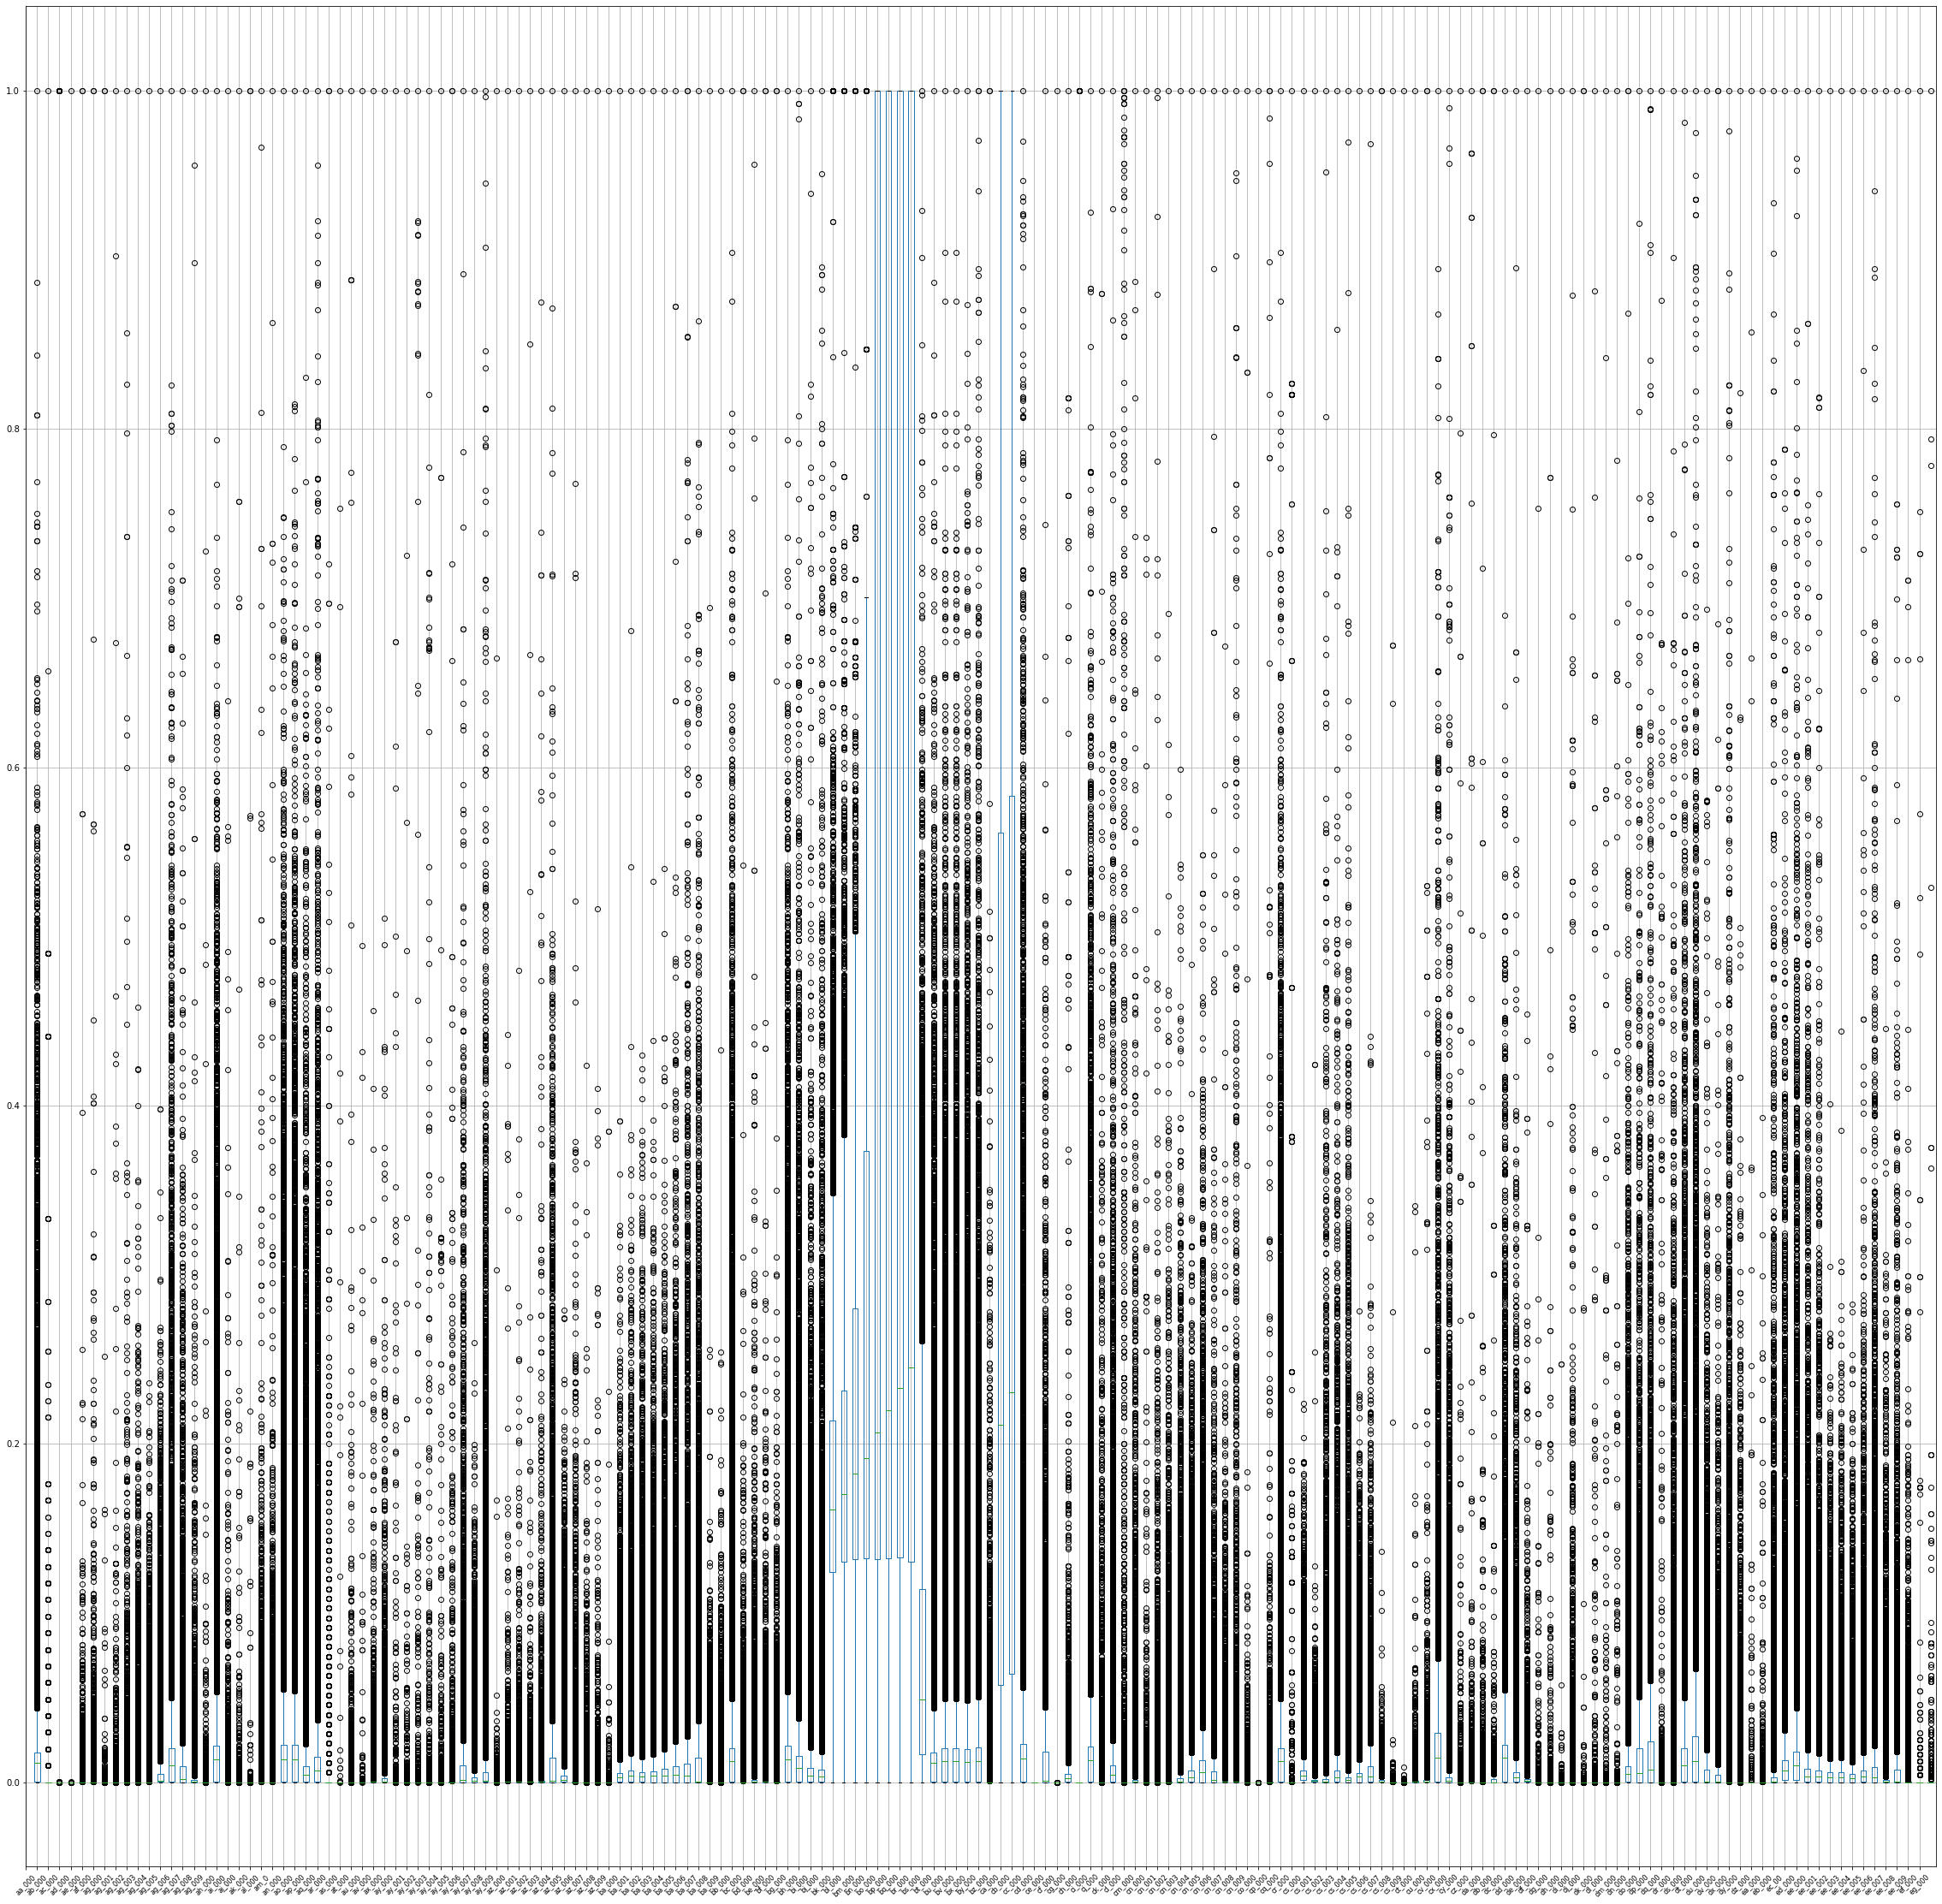

In [10]:
## VISUALISATION
# SCATTER BOXPLOT
X_train_norm.boxplot(figsize=(40,40))
plt.xticks(range(X_train_norm.shape[1]), X_train_norm.columns, fontsize=8, rotation=45)
pyplot.show()

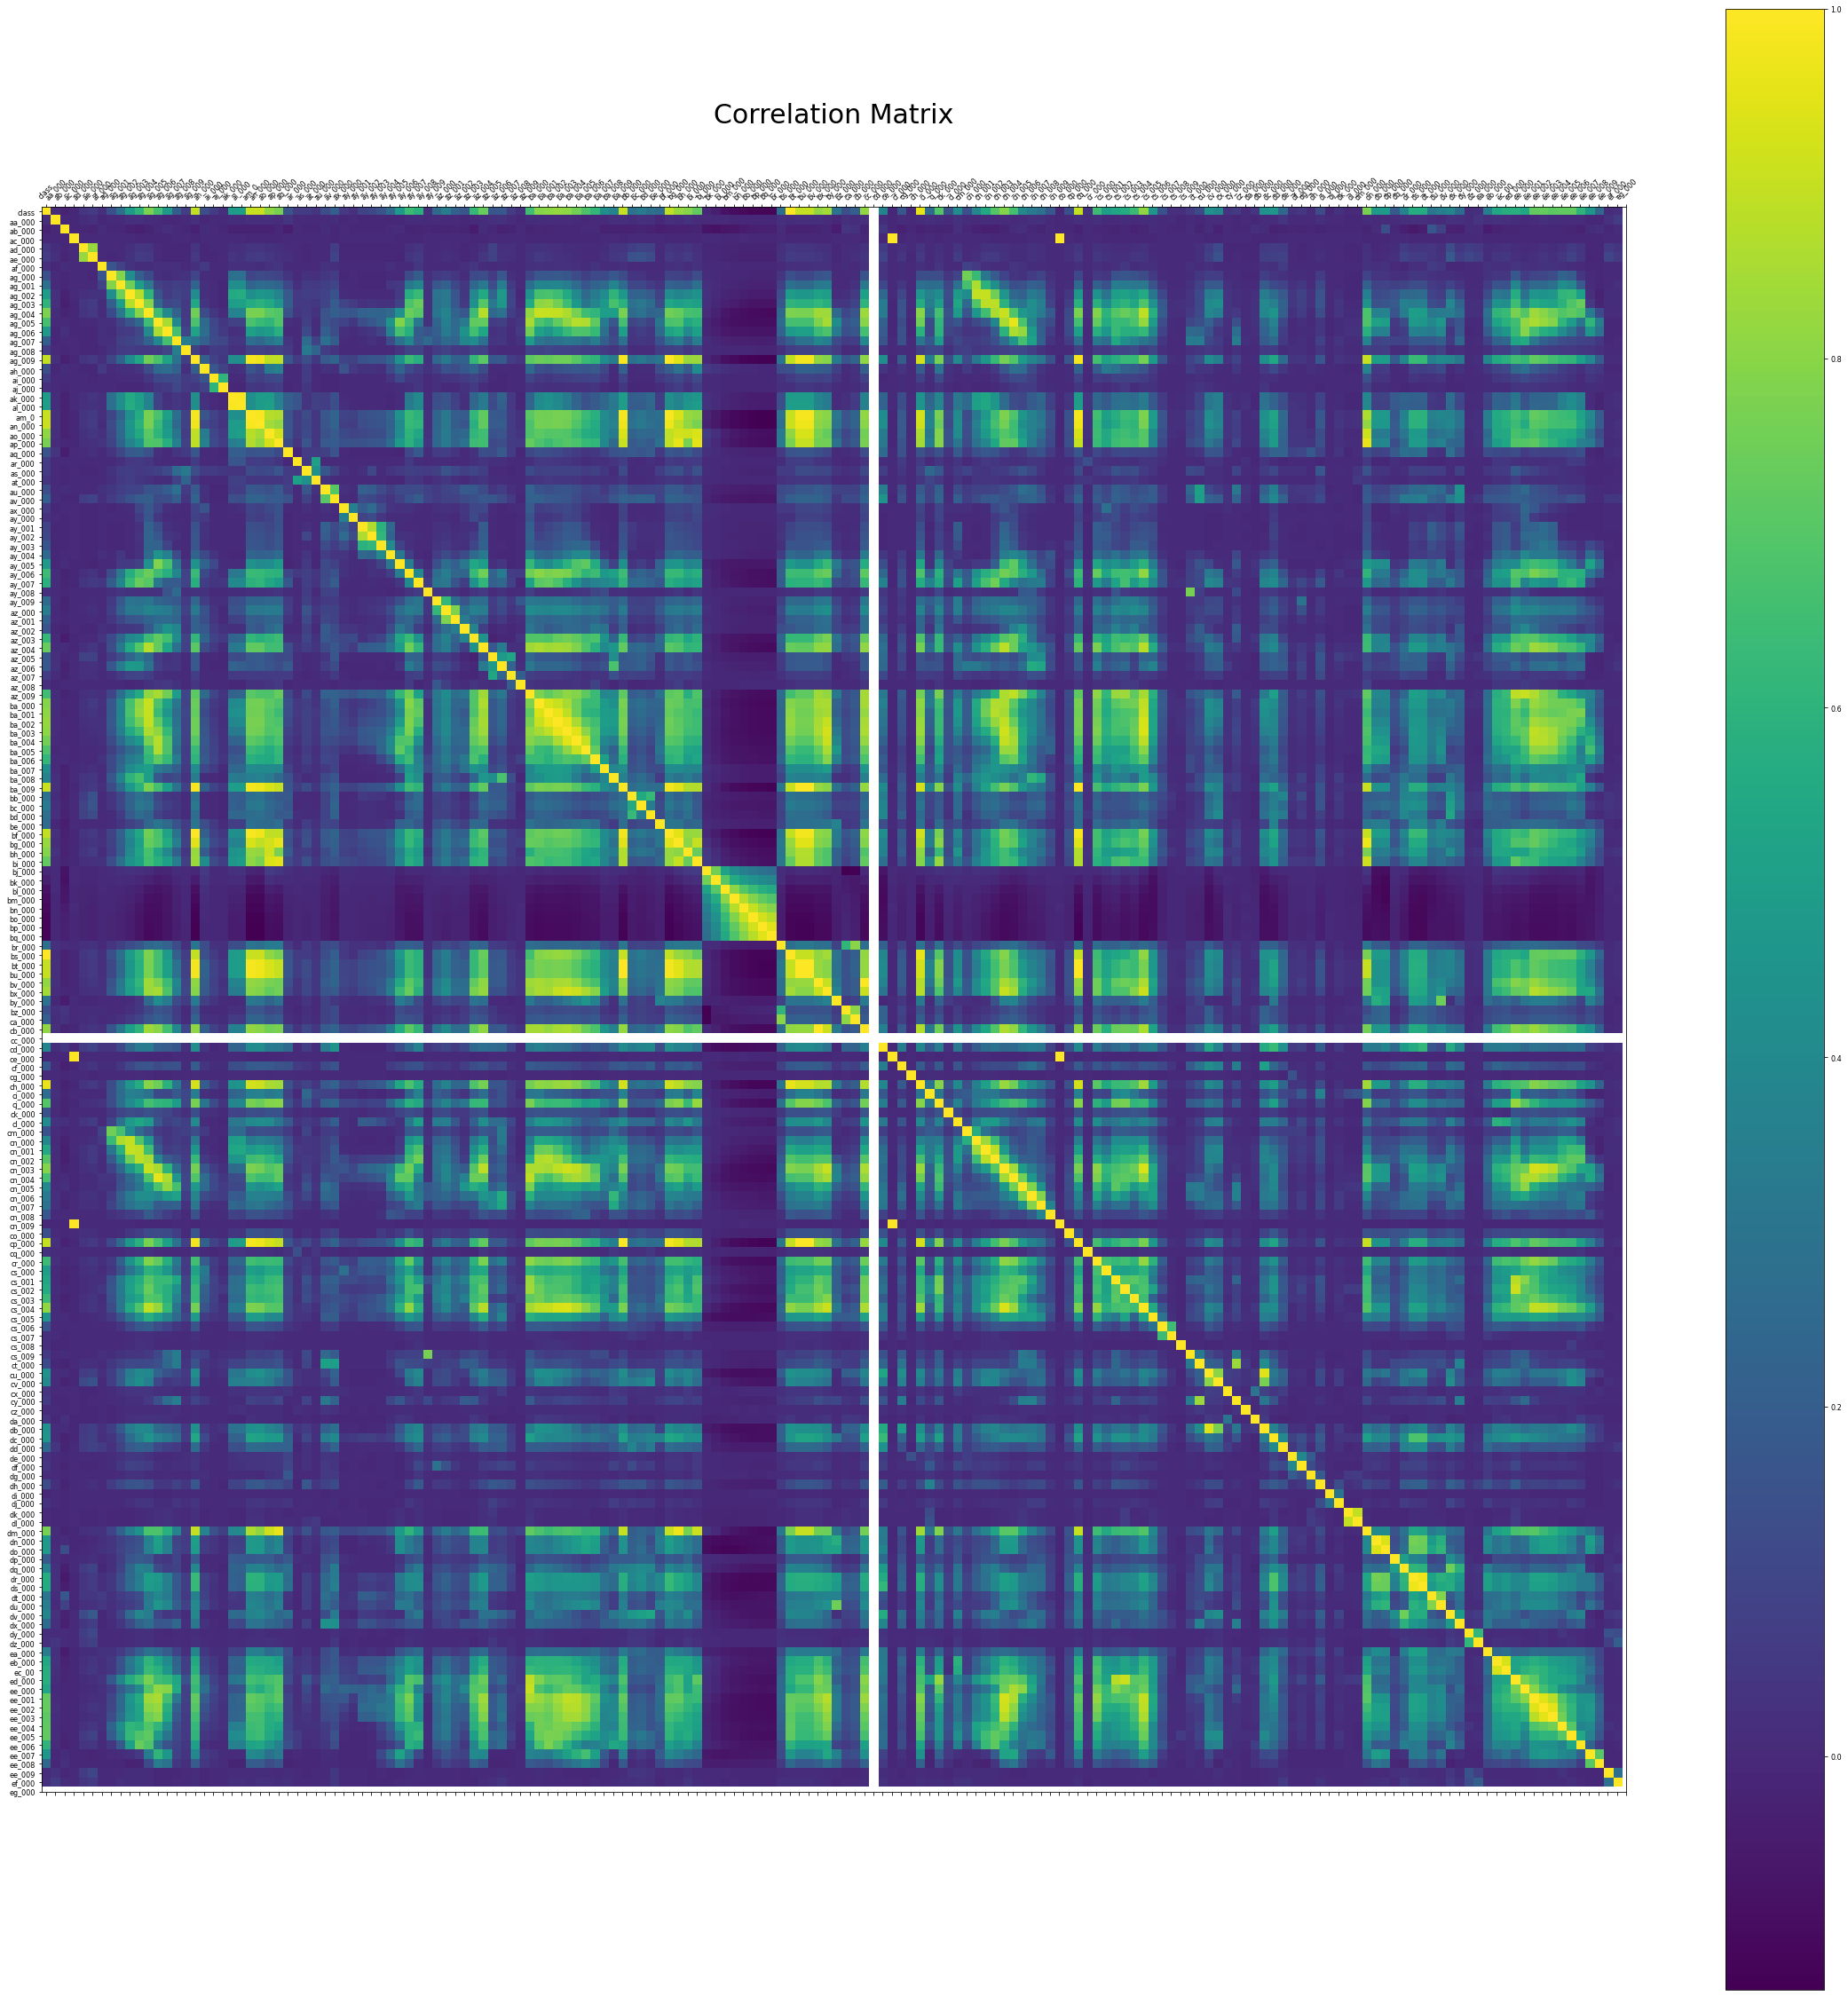

In [11]:
# CORRELATION MATRIX
f = plt.figure(figsize=(40, 40))
plt.matshow(data_train.corr(), fignum=f.number)
plt.xticks(range(data_train.shape[1]), data_train.columns, fontsize=8, rotation=45)
plt.yticks(range(data_train.shape[1]), data_train.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=30);

Class 0: 58988
Class 1: 999


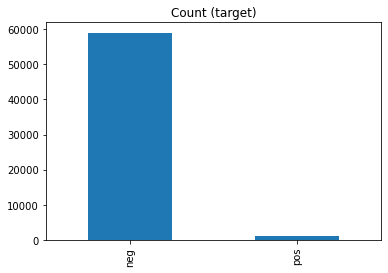

In [12]:
## REBALANCING - The dataset is not balanced, since we have 59000 negatives and 100 positives
target_count = data_train['class'].value_counts()
print('Class 0:', target_count['neg'])
print('Class 1:', target_count['pos'])
target_count.plot(kind='bar', title='Count (target)')

In [13]:
# I have combined oversampling (SMOTE) with random undersampling.

# I will first oversample the minority class using the SMOTE method.
over_sampler = SMOTE(sampling_strategy='minority')

# Then I fit the object to our training data
X_smote, y_smote = over_sampler.fit_sample(X_train_norm,y_train_raw)

# Finally I undersample randomly the majority class
under_sampler = RandomUnderSampler(sampling_strategy='majority')

# The new X, Y and training dataset are consequently changed
X_train, y_train = under_sampler.fit_sample(X_smote, y_smote)
data_resampled = pd.concat([y_train, X_train], axis=1)
data_resampled.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,0.000443,0.0,1.220252e-08,4.659671e-10,0.0,0.0,0.0,0.0,0.00079,...,0.000099,0.000103,1.667072e-04,0.000194,0.000210,0.000073,0.000004,0.000000,0.0,0.0
1,neg,0.014298,0.0,0.000000e+00,5.451815e-08,0.0,0.0,0.0,0.0,0.00000,...,0.004462,0.003888,2.799252e-03,0.003565,0.004587,0.001047,0.022194,0.007504,0.0,0.0
2,neg,0.008582,0.0,9.999998e-01,1.840570e-08,0.0,0.0,0.0,0.0,0.00000,...,0.001582,0.002701,3.685798e-03,0.007893,0.002854,0.000003,0.000000,0.000000,0.0,0.0
3,neg,0.000014,0.0,1.407983e-08,3.028786e-09,0.0,0.0,0.0,0.0,0.00000,...,0.000010,0.000002,2.676208e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,neg,0.000076,0.0,9.999998e-01,5.824588e-09,0.0,0.0,0.0,0.0,0.00000,...,0.000023,0.000022,1.918635e-05,0.000031,0.000042,0.000012,0.000004,0.000000,0.0,0.0


Class 0: 58988
Class 1: 58988


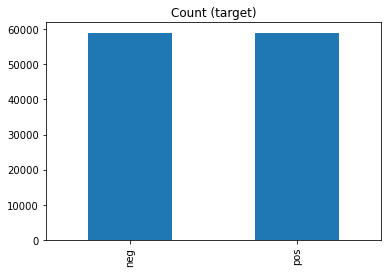

In [14]:
# I will count positive and negative class values to verify they are rebalanced
r_target_count = data_resampled['class'].value_counts()
print('Class 0:', r_target_count['neg'])
print('Class 1:', r_target_count['pos'])
r_target_count.plot(kind='bar', title='Count (target)')

In [15]:
### 3. FEATURE SELECTION AND FEATURE EXTRACTION

## 3.1 FEATURE SELECTION

# 3.2.1 SelectKbest
# I will use the SelectKbest function with chi2 to do a statistical test
# and learn which are the best 10 features that provide more information. It works because I 
# do not have any negative values in the dataset
test = SelectKBest(score_func=chi2, k=15)
fit = test.fit(X_train, y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(15,'Score'))  # print 15 best features

    Feature_Name         Score
94        ci_000  12160.463385
88        cc_000  11911.705311
62        bb_000  11271.107757
82        bv_000  11241.193318
81        bu_000  11241.192384
111       cq_000  11241.192067
16        ah_000  10760.101168
0         aa_000  10721.906418
67        bg_000  10715.357297
80        bt_000  10660.654937
23        ao_000  10590.121934
22        an_000  10572.249534
83        bx_000  10009.113801
84        by_000  10000.857809
25        aq_000   9847.959245


In [16]:
## FEATURE EXTRACTION

# 3.2.1 PCA dimensionality reduction

pca = PCA(n_components=15)
fit_pca = pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
# eigenvectors = pd.DataFrame(data = X_t_train
  #           , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print("Explained Variance: %s" % fit_pca.explained_variance_ratio_)
print(fit_pca.components_)

Explained Variance: [0.34075395 0.22830901 0.07672135 0.06253753 0.03916932 0.03443651
 0.02810037 0.02681084 0.02396867 0.01589224 0.01126158 0.01031649
 0.00825514 0.00728376 0.00555942]
[[ 1.54854930e-01  1.53394624e-04 -3.26210703e-02 ...  9.45607943e-03
   2.82947380e-04  8.39562696e-05]
 [ 1.14057672e-01 -1.01523850e-04 -3.49143907e-02 ...  5.74608798e-03
   6.87995370e-05  9.29437796e-06]
 [-3.18209053e-02  4.68769886e-04 -6.41534341e-02 ... -3.26435487e-03
   8.12453068e-05  1.15556225e-04]
 ...
 [ 5.98508547e-03 -5.68700866e-04 -1.75619112e-03 ...  9.15022339e-03
   2.46602099e-04  1.03708101e-03]
 [ 1.40448489e-01  4.59517792e-04  1.65491549e-02 ... -2.30510235e-02
   7.60310027e-04  1.43709057e-03]
 [ 6.99854851e-02 -7.44120082e-04  3.04928186e-03 ...  5.15227148e-03
   6.85579009e-03  2.56655220e-03]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


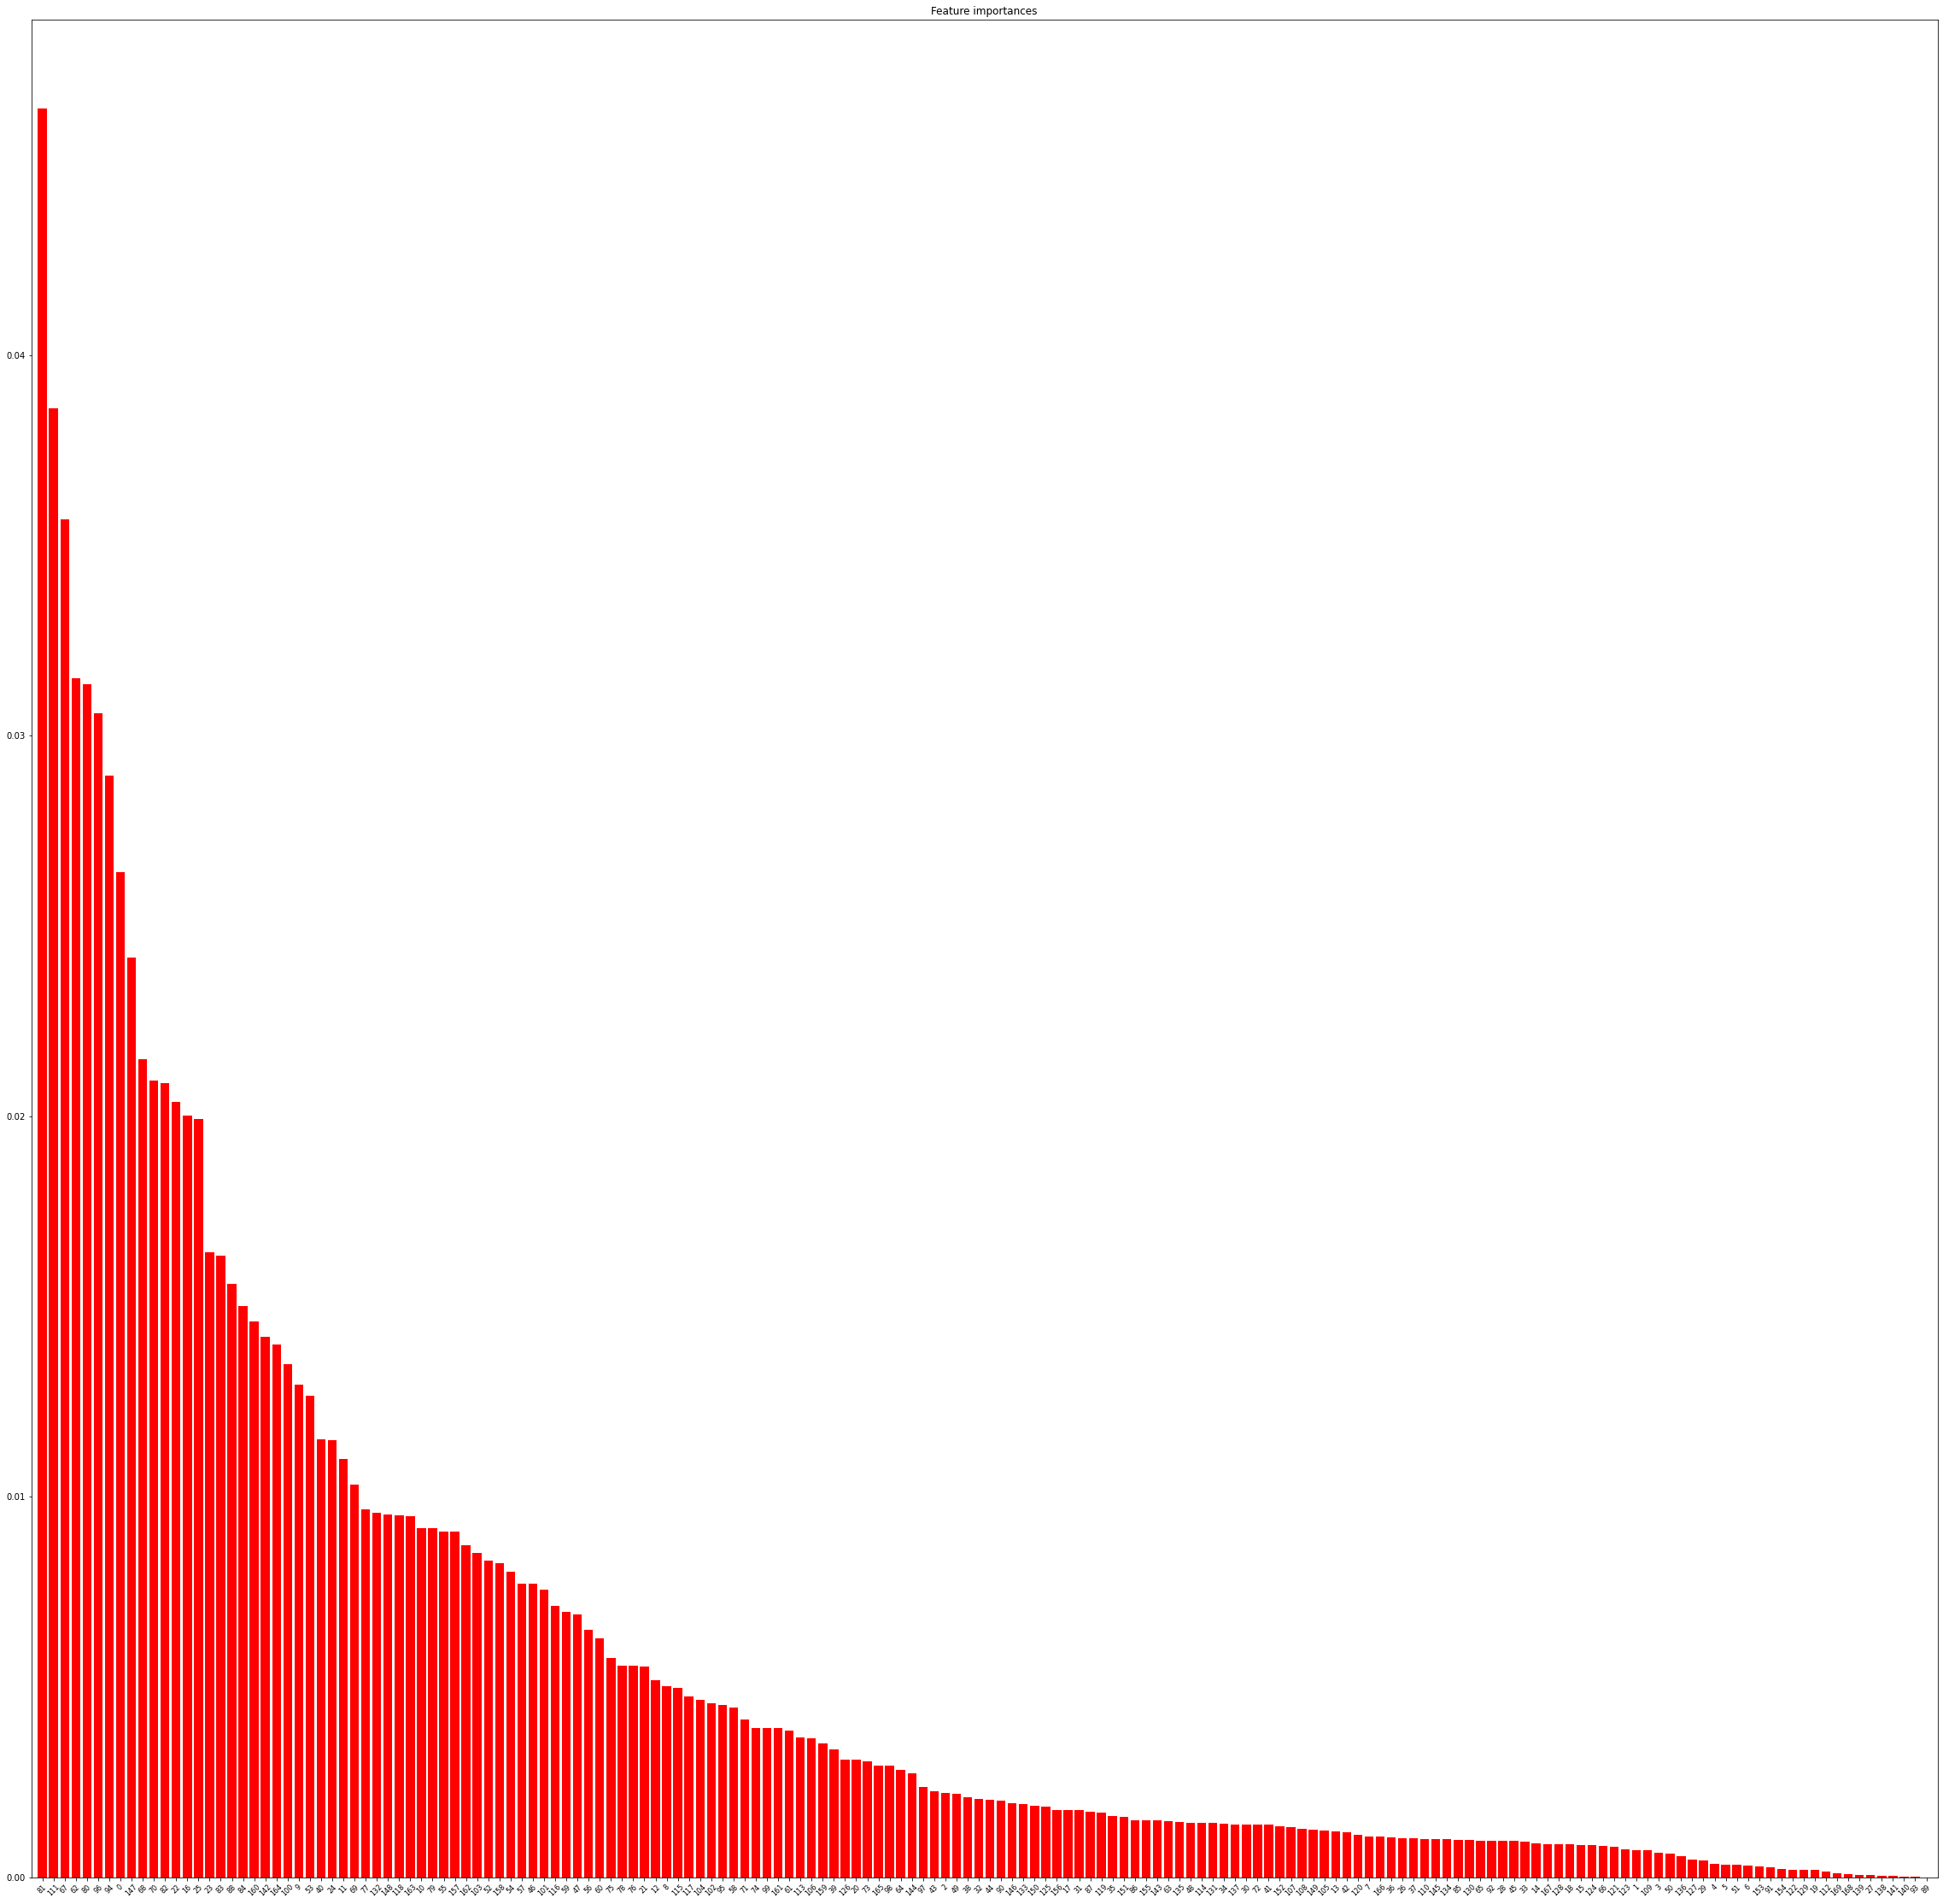

In [17]:
# 3.2.2 ExtraTrees classifier
model_xtrees = ExtraTreesClassifier()
model_xtrees.fit(X_train, y_train)

feature_importance = model_xtrees.feature_importances_
indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(40, 40))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importance[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices, fontsize=8, rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [18]:
### 4. ALGORITHM SELECTION

## 4.1. Classification with Logistic Regression
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
y_pred_log = clf_log.predict(X_test)

# Metrics with default parameters in Logistic Regression
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_log)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_log,average="binary", pos_label="pos")))
print('Recall Score : ' + str(recall_score(y_test,y_pred_log, average="binary", pos_label="pos")))
print('F1 Score : ' + str(f1_score(y_test,y_pred_log,average="binary", pos_label="pos")))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_log)))

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy Score : 0.9736052039029272
Precision Score : 0.46862483311081443
Recall Score : 0.936
F1 Score : 0.6245551601423488
Confusion Matrix : 
[[15215   398]
 [   24   351]]


In [19]:
## 4.2. Classification with Decision Trees
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)

# Metrics with default parameters in Decision Trees
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_tree)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_tree,average="binary", pos_label="pos")))
print('Recall Score : ' + str(recall_score(y_test,y_pred_tree, average="binary", pos_label="pos")))
print('F1 Score : ' + str(f1_score(y_test,y_pred_tree,average="binary", pos_label="pos")))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_tree)))

Accuracy Score : 0.98173630222667
Precision Score : 0.5912087912087912
Recall Score : 0.7173333333333334
F1 Score : 0.6481927710843373
Confusion Matrix : 
[[15427   186]
 [  106   269]]


In [20]:
## 4.3. Classification with Random Forest
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

# Metrics with default parameters in Random forests
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rf)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_rf,average="binary", pos_label="pos")))
print('Recall Score : ' + str(recall_score(y_test,y_pred_rf, average="binary", pos_label="pos")))
print('F1 Score : ' + str(f1_score(y_test,y_pred_rf,average="binary", pos_label="pos")))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_rf)))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy Score : 0.9900550412809607
Precision Score : 0.7634146341463415
Recall Score : 0.8346666666666667
F1 Score : 0.7974522292993631
Confusion Matrix : 
[[15516    97]
 [   62   313]]


In [21]:
# 4.4. Neural networks

# I will first convert the target class into some categorical variable.
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)
# I define the keras model with the NN structure below
model = Sequential([
  Dense(64, activation='relu', input_shape=(170,)), 
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_enc, epochs=20, batch_size=250)

test_loss, test_acc = model.evaluate(X_test, y_test_enc)
print('Test accuracy:', test_acc)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Epoch 1/20
117976/117976 [==============================] - 7s 63us/step - loss: 0.1736 - accuracy: 0.9478
Epoch 2/20
117976/117976 [==============================] - 5s 41us/step - loss: 0.0904 - accuracy: 0.9708
Epoch 3/20
117976/117976 [==============================] - 5s 42us/step - loss: 0.0711 - accuracy: 0.9779
Epoch 4/20
117976/117976 [==============================] - 5s 42us/step - loss: 0.0579 - accuracy: 0.9826
Epoch 5/20
117976/117976 [==============================] - 5s 41us/step - loss: 0.0496 - accuracy: 0.9849
Epoch 6/20
117976/117976 [==============================] - 5s 46us/step - loss: 0.0424 - accuracy: 0.9872
Epoch 7/20
117976/117976 [==============================] - 6s 50us/step - loss: 0.0372 - accuracy: 0.9887
Epoch 8/20
117976/117976 [==============================] - 5s 44us/step - loss: 0.0326 - accuracy: 0.9901
Epoch 9/20
117976/117976 [==============================] - 6s 50us/step - loss: 0.0294 - accuracy: 0.9908
Epoch 10/20
117976/117976 [==========

In [20]:
### 5. PARAMETER TUNING - GRID SEARCH

## 5.1. Parameter tuning for the Logistic Regression classifier

# I define the grid values I will iterate against
clf_log = LogisticRegression()
grid_values = {'penalty': ('l1','l2'),'C':[0.001,0.01,0.1,1,10,25]}
clf_log_opt = GridSearchCV(clf_log, param_grid = grid_values)
clf_log_opt.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_log_opt = clf_log_opt.predict(X_test)
print(clf_log_opt.best_params_)

# Metrics with default parameters in Logistic Regression
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_log_opt)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_log_opt, average="binary", pos_label="pos")))
print('Recall Score : ' + str(recall_score(y_test,y_pred_log_opt, average="binary", pos_label="pos")))
print('F1 Score : ' + str(f1_score(y_test,y_pred_log_opt, average="binary", pos_label="pos")))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_log_opt)))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

{'C': 25, 'penalty': 'l2'}
Accuracy Score : 0.9754816112084063
Precision Score : 0.48773448773448774
Recall Score : 0.9013333333333333
F1 Score : 0.6329588014981273
Confusion Matrix : 
[[15258   355]
 [   37   338]]


In [21]:
## 5.2. Parameter tuning for the Decision Trees classifier

# I define the grid values I will iterate against
clf_tree = DecisionTreeClassifier()
grid_values = {'max_depth': [10,30,50],'min_samples_split':[2,5,10]}
clf_tree_opt = GridSearchCV(clf_tree, param_grid = grid_values)
clf_tree_opt.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_tree_opt = clf_tree_opt.predict(X_test)
print(clf_tree_opt.best_params_)

# Metrics with default parameters in Logistic Regression
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_tree_opt)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_tree_opt, average="binary", pos_label="pos")))
print('Recall Score : ' + str(recall_score(y_test,y_pred_tree_opt, average="binary", pos_label="pos")))
print('F1 Score : ' + str(f1_score(y_test,y_pred_tree_opt, average="binary", pos_label="pos")))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_tree_opt)))

{'max_depth': 50, 'min_samples_split': 5}
Accuracy Score : 0.9814861145859395
Precision Score : 0.5864332603938731
Recall Score : 0.7146666666666667
F1 Score : 0.6442307692307693
Confusion Matrix : 
[[15424   189]
 [  107   268]]


In [22]:
## 5.3. Parameter tuning for the Random Forests classifier

# I define the grid values I will iterate against
clf_rf = RandomForestClassifier()
grid_values = {'n_estimators': [100,150],'max_depth':[10,15]}
clf_rf_opt = GridSearchCV(clf_rf, param_grid = grid_values)
clf_rf_opt.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_rf_opt = clf_rf_opt.predict(X_test)
print(clf_rf_opt.best_params_)

# Metrics with default parameters in Logistic Regression
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rf_opt)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_rf_opt, average="binary", pos_label="pos")))
print('Recall Score : ' + str(recall_score(y_test,y_pred_rf_opt, average="binary", pos_label="pos")))
print('F1 Score : ' + str(f1_score(y_test,y_pred_rf_opt, average="binary", pos_label="pos")))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_rf_opt)))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

{'max_depth': 15, 'n_estimators': 150}
Accuracy Score : 0.9859894921190894
Precision Score : 0.6454720616570327
Recall Score : 0.8933333333333333
F1 Score : 0.7494407158836689
Confusion Matrix : 
[[15429   184]
 [   40   335]]


In [43]:
# 5.4 Finally I will calculate some alternatives for different batch sizes and epochs to find the optimal
# hyperparameters
model_final = Sequential([
  Dense(64, activation='relu', input_shape=(170,)), 
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')])

model_final.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Option 1 - 20 epochs, batch size = 250
model_final.fit(X_train, y_train_enc, epochs=20, batch_size=250)

y_pred_nn = model_final.predict_classes(X_test)
print(classification_report(y_test_enc,y_pred_nn))

Epoch 1/20
117976/117976 [==============================] - 7s 63us/step - loss: 0.1689 - accuracy: 0.9460
Epoch 2/20
117976/117976 [==============================] - 5s 45us/step - loss: 0.0952 - accuracy: 0.9689
Epoch 3/20
117976/117976 [==============================] - 5s 45us/step - loss: 0.0784 - accuracy: 0.9754
Epoch 4/20
117976/117976 [==============================] - 5s 44us/step - loss: 0.0665 - accuracy: 0.9797
Epoch 5/20
117976/117976 [==============================] - 5s 44us/step - loss: 0.0569 - accuracy: 0.9830
Epoch 6/20
117976/117976 [==============================] - 8s 65us/step - loss: 0.0495 - accuracy: 0.9851
Epoch 7/20
117976/117976 [==============================] - 6s 51us/step - loss: 0.0435 - accuracy: 0.9870
Epoch 8/20
117976/117976 [==============================] - 8s 66us/step - loss: 0.0389 - accuracy: 0.9882
Epoch 9/20
117976/117976 [==============================] - 7s 60us/step - loss: 0.0339 - accuracy: 0.9898
Epoch 10/20
117976/117976 [==========

In [44]:
# Option 2 - 30 epochs, batch size = 250
model_final.fit(X_train, y_train_enc, epochs=30, batch_size=250)

y_pred_nn = model_final.predict_classes(X_test)
print(classification_report(y_test_enc,y_pred_nn))

Epoch 1/30
117976/117976 [==============================] - 5s 44us/step - loss: 0.0140 - accuracy: 0.9959
Epoch 2/30
117976/117976 [==============================] - 5s 44us/step - loss: 0.0135 - accuracy: 0.9961
Epoch 3/30
117976/117976 [==============================] - 5s 43us/step - loss: 0.0123 - accuracy: 0.9964
Epoch 4/30
117976/117976 [==============================] - 6s 52us/step - loss: 0.0121 - accuracy: 0.9965
Epoch 5/30
117976/117976 [==============================] - 5s 46us/step - loss: 0.0108 - accuracy: 0.9970
Epoch 6/30
117976/117976 [==============================] - 6s 50us/step - loss: 0.0108 - accuracy: 0.9970
Epoch 7/30
117976/117976 [==============================] - 6s 50us/step - loss: 0.0106 - accuracy: 0.9970
Epoch 8/30
117976/117976 [==============================] - 7s 59us/step - loss: 0.0092 - accuracy: 0.9972
Epoch 9/30
117976/117976 [==============================] - 6s 52us/step - loss: 0.0090 - accuracy: 0.9974
Epoch 10/30
117976/117976 [==========

In [52]:
# Option 3 - 30 epochs, batch size = 150
model_final.fit(X_train, y_train_enc, epochs=30, batch_size=150)

y_pred_nn = model_final.predict_classes(X_test)
print(confusion_matrix(y_test_enc,y_pred_nn))
print(classification_report(y_test_enc,y_pred_nn))

Epoch 1/30
117976/117976 [==============================] - 8s 64us/step - loss: 0.0012 - accuracy: 0.9997
Epoch 2/30
117976/117976 [==============================] - 8s 71us/step - loss: 0.0020 - accuracy: 0.9994
Epoch 3/30
117976/117976 [==============================] - 7s 60us/step - loss: 0.0028 - accuracy: 0.9991
Epoch 4/30
117976/117976 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 0.99 - 7s 58us/step - loss: 0.0010 - accuracy: 0.9997
Epoch 5/30
117976/117976 [==============================] - 7s 58us/step - loss: 0.0019 - accuracy: 0.9994
Epoch 6/30
117976/117976 [==============================] - 7s 59us/step - loss: 0.0017 - accuracy: 0.9995
Epoch 7/30
117976/117976 [==============================] - 7s 62us/step - loss: 0.0014 - accuracy: 0.9995
Epoch 8/30
117976/117976 [==============================] - 7s 62us/step - loss: 0.0019 - accuracy: 0.9995
Epoch 9/30
117976/117976 [==============================] - 7s 61us/step - loss: 0.0027 - accuracy: 0.

In [46]:
# Option 4 - 20 epochs, batch size = 150
model_final.fit(X_train, y_train_enc, epochs=20, batch_size=150)

y_pred_nn = model_final.predict_classes(X_test)
print(classification_report(y_test_enc,y_pred_nn))

Epoch 1/20
117976/117976 [==============================] - 8s 71us/step - loss: 0.0024 - accuracy: 0.9992
Epoch 2/20
117976/117976 [==============================] - 7s 61us/step - loss: 0.0048 - accuracy: 0.9987
Epoch 3/20
117976/117976 [==============================] - 7s 61us/step - loss: 0.0031 - accuracy: 0.9990
Epoch 4/20
117976/117976 [==============================] - 7s 61us/step - loss: 0.0018 - accuracy: 0.9995
Epoch 5/20
117976/117976 [==============================] - 7s 60us/step - loss: 0.0049 - accuracy: 0.9987
Epoch 6/20
117976/117976 [==============================] - 7s 60us/step - loss: 0.0017 - accuracy: 0.9995
Epoch 7/20
117976/117976 [==============================] - 7s 63us/step - loss: 0.0025 - accuracy: 0.9992
Epoch 8/20
117976/117976 [==============================] - 8s 65us/step - loss: 0.0048 - accuracy: 0.9986
Epoch 9/20
117976/117976 [==============================] - 8s 65us/step - loss: 0.0019 - accuracy: 0.9994
Epoch 10/20
117976/117976 [==========